# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #append city to cities
    cities.append(city)
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)


1500

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
weather = []
latitude = []
temperature = []
cloudiness = []
humidity = []
wind_speed = []

for city in cities:
    city = city.replace(" ", "%20")
    target_url = f'http://api.openweathermap.org/data/2.5/weather?appid={api_key}&q={city}'
    
    
    url = requests.get(target_url).json()
    try:
        latitude.append(url['coord']['lat'])
        temperature.append(url['main']['temp'])
        humidity.append(url['main']['humidity'])
        cloudiness.append(url['clouds']['all'])
        wind_speed.append(url['wind']['speed'])
    except KeyError:
        print(city)
    

tumannyy
taolanaro
ostuman
saleaula
burica
toliary
taolanaro
nizhneyansk
cam%20pha
grand%20river%20south%20east
temaraia
sakakah
attawapiskat
saleaula
bur%20gabo
safaqis
tumannyy
atka
tabiauea
tsihombe
camana
tsihombe
jiddah
illoqqortoormiut
taolanaro
belushya%20guba
hunza
amderma
saleaula
sedelnikovo
dolbeau
barbar
saleaula
barentsburg
sentyabrskiy
taolanaro
taolanaro
toftir
bengkulu
samalaeulu
grand%20centre
sentyabrskiy
uroteppa
bardiyah
tumannyy
tanjong%20malim
taolanaro
vaitupu
louisbourg
masjed-e%20soleyman
pemangkat
labrea
barentsburg
tsihombe
skalnyy
barentsburg
taolanaro
taolanaro
nizhneyansk
grand%20centre
barentsburg
vastervik
bengkulu
porto%20santo
taolanaro
nizhneyansk
bengkulu
signagi
barentsburg
mocambique
taolanaro
belushya%20guba
stekolnyy
belushya%20guba
illoqqortoormiut
barentsburg
sukhumi
illoqqortoormiut
barentsburg
jahrom
taolanaro
olafsvik
grand%20river%20south%20east
saleaula
andenes
meyungs
illoqqortoormiut
krasnoselkup
grand%20river%20south%20east
paucartambo


1370

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
weather_dict = {
    "Latitude": latitude,
    "Temperature": temperature,
    "Humidity": humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
}
data_frame = pd.DataFrame.from_dict(weather_dict)
data_frame.to_csv(output_data_file)
data_frame

,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,-9.80,300.464,100,44,6.73
1,-23.12,299.539,100,32,5.03
2,-23.12,299.539,100,32,5.03
3,-54.81,288.150,51,40,12.90
4,71.98,250.839,63,44,5.78
5,42.65,267.180,55,90,4.60
6,71.97,242.289,69,56,5.68
7,39.45,279.070,87,40,2.10
8,-42.48,295.150,60,0,3.60
9,-23.12,299.539,100,32,5.03


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

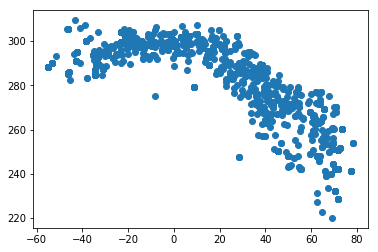

In [28]:
plt.scatter(latitude,temperature)

#### Latitude vs. Humidity Plot

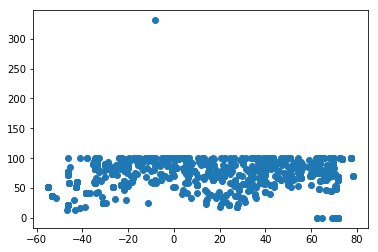

In [24]:
plt.scatter(latitude,humidity)

#### Latitude vs. Cloudiness Plot

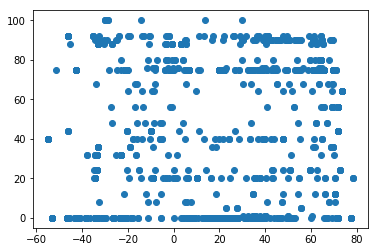

In [29]:
plt.scatter(latitude, cloudiness)

#### Latitude vs. Wind Speed Plot

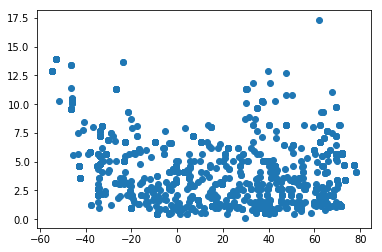

In [30]:
plt.scatter(latitude,wind_speed)